# Predict stock prices  with Long short-term memory (LSTM)

This simple example will show you how LSTM models predict time series data. Stock market data is a great choice for this because it's quite regular and widely available via the Internet.

## Install requirements
We install Tensorflow 2.0 with GPU support first

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-alpha0


In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install pydot pydot-ng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Introduction

LSTMs are very powerful in sequence prediction problems. They can store past information.

## Loading the dataset
I use pandas-datareader to get the historical stock prices from Yahoo! finance. For this example, I get only the historical data till the end of *training_end_data*.  

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'Algo Final'	    project-1
'Colab Notebooks'   project-2
 Compiler	    Robotics
 dataset.zip	    robotix_dataset
'Deep Learning'    'کارهای روزانه (۱۴ تا ۲۰ خرداد).gsheet'
 DL-TA		   'کارهای روزانه (21 تا 27 خرداد).gsheet'
 GOOG.csv	   'کارهای روزانه (۲۴ تا ۳۰ اردیبهشت).gsheet'
 GOOG.gsheet	   'کارهای روزانه (28 خرداد تا 3 تیر).gsheet'
 Network	   'کارهای روزانه (۳۱ اردیبهشت تا ۶ خرداد).gsheet'
 new_project2	   'کارهای روزانه (۶ تا ۱۳ خرداد).gsheet'
 others


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

In [ ]:
start_date = '2013-12-20'
end_date = '2021-11-04'

stock_data = pd.read_csv('/content/drive/MyDrive/GOOG.csv')
train_stock_data = stock_data[0:1983]


In [ ]:
train_stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167
5,2013-12-30,558.078186,558.157898,552.439331,552.658508,552.658508,2481466
6,2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725979
7,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656454
8,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345894
9,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864


In [ ]:
train_stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03
mean,1102.419486,1112.807280,1092.450837,1103.097195,1103.097195,1.791473e+06
std,565.243396,570.939114,560.799268,566.304611,566.304611,1.008781e+06
min,493.295654,494.618011,486.225067,491.201416,491.201416,7.922000e+03
25%,699.755005,706.794983,692.723480,699.774994,699.774994,1.215800e+06
50%,1017.210022,1031.579956,1006.289978,1019.270020,1019.270020,1.519300e+06
75%,1250.294983,1265.705017,1240.500000,1251.739990,1251.739990,2.010550e+06
max,2963.300049,2999.000000,2932.699951,2973.659912,2973.659912,1.117433e+07


In [ ]:
train_stock_data_len = train_stock_data['Close'].count()
print(train_stock_data_len)

1983


I'm only interested in *close* prices

In [ ]:
close_prices = train_stock_data.iloc[:, 4:5].values
print(close_prices)

[[ 548.255005]
 [ 555.467957]
 [ 553.844055]
 ...
 [2917.26001 ]
 [2935.800049]
 [2973.659912]]


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [ ]:
all_bussinessdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_bussinessdays)

DatetimeIndex(['2013-12-20', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02',
               ...
               '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02',
               '2021-11-03', '2021-11-04'],
              dtype='datetime64[ns]', length=2055, freq='B')


In [ ]:
close_prices = train_stock_data.reindex(all_bussinessdays)
close_prices = train_stock_data.fillna(method='ffill')

In [ ]:
close_prices.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167
5,2013-12-30,558.078186,558.157898,552.439331,552.658508,552.658508,2481466
6,2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725979
7,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656454
8,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345894
9,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864


The dataset is now complete and free of missing values. Let's have a look to the data frame summary:

## Feature scaling

In [ ]:
training_set = close_prices.iloc[:, 4:5].values

In [ ]:
print(training_set)

[[ 548.255005]
 [ 555.467957]
 [ 553.844055]
 ...
 [2917.26001 ]
 [2935.800049]
 [2973.659912]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(1983, 1)


LSTMs expect the data in a specific format, usually a 3D tensor. I start by creating data with 60 days and converting it into an array using NumPy. Next, I convert the data into a 3D dimension array with feature_set samples, 60 days and one feature at each step.

In [ ]:
features = []
labels = []
for i in range(30, train_stock_data_len):
    features.append(training_set_scaled[i-30:i, 0])
    labels.append(training_set_scaled[i, 0])

features = np.array(features)
labels = np.array(labels)

features = np.reshape(features, (features.shape[0], features.shape[1], 1))

In [ ]:
print(labels)

[0.03152685 0.03488993 0.03839747 ... 0.97728063 0.98474904 1.        ]


In [ ]:
print(features)

[[[0.0229827 ]
  [0.02588826]
  [0.02523411]
  ...
  [0.03910581]
  [0.02956639]
  [0.03051551]]

 [[0.02588826]
  [0.02523411]
  [0.02636183]
  ...
  [0.02956639]
  [0.03051551]
  [0.03152685]]

 [[0.02523411]
  [0.02636183]
  [0.02655045]
  ...
  [0.03051551]
  [0.03152685]
  [0.03488993]]

 ...

 [[0.92719718]
  [0.93760625]
  [0.94476045]
  ...
  [0.97942369]
  [0.99667668]
  [0.96045052]]

 [[0.93760625]
  [0.94476045]
  [0.951258  ]
  ...
  [0.99667668]
  [0.96045052]
  [0.97728063]]

 [[0.94476045]
  [0.951258  ]
  [0.94213805]
  ...
  [0.96045052]
  [0.97728063]
  [0.98474904]]]


Feature tensor with three dimension: features[0] contains the ..., features[1] contains the last 60 days of values and features [2] contains the  ...

In [ ]:
print(features.shape)

(1953, 30, 1)


## Create the LSTM network
Let's create a sequenced LSTM network with 50 units. Also the net includes some dropout layers with 0.2 which means that 20% of the neurons will be dropped.

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (features.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
#tf.keras.utils.plot_model(model, to_file='my_model.png')


In [ ]:
# Run tensorboard with the logdir
#import os
#LOG_BASE_DIR = './log'
#os.makedirs(LOG_BASE_DIR, exist_ok=True)

In [ ]:
#!ls -l log

## Load the Colab TensorBoard extention and start TensorBoard inline

In [ ]:
#%load_ext tensorboard.notebook
#%tensorboard --logdir {LOG_BASE_DIR}

## Define a TensorBoard callback

In [ ]:
#import datetime
#logdir = os.path.join(LOG_BASE_DIR, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
#from tensorflow.keras.callbacks import TensorBoard

#tbCallBack = TensorBoard(logdir,histogram_freq=1)

The model will be compiled and optimize by the adam optimizer and set the loss function as mean_squarred_error

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#import os
#print(os.environ)

In [ ]:
#tf.test.gpu_device_name()

In [ ]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [ ]:
from time import time
start = time()
history = model.fit(features, labels, epochs = 20, batch_size = 32, verbose = 1)
end = time()

Epoch 1/20
62/62 [==============================] - 19s 13ms/step - loss: 0.0093
Epoch 2/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 3/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 4/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 5/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 6/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 7/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 8/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0018
Epoch 9/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 10/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 11/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 12/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 13/20
62/62 [=================

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 31.276707649230957 seconds


In [ ]:
#  [samples, days, features]
print(features.shape)

(1953, 30, 1)


In [ ]:
testing_start_date = '2021-11-05'
testing_end_date = '2021-12-17'

test_stock_data = stock_data[-30:]

In [ ]:
test_stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1983,2021-11-05,2987.070068,3011.415039,2973.040039,2984.820068,2984.820068,1019700
1984,2021-11-08,3000.000000,3020.689941,2982.399902,2987.030029,2987.030029,919400
1985,2021-11-09,2994.919922,3007.570068,2950.139893,2984.969971,2984.969971,843800
1986,2021-11-10,2960.195068,2974.000000,2906.500000,2932.520020,2932.520020,1135400
1987,2021-11-11,2942.139893,2970.044922,2933.889893,2934.959961,2934.959961,623200
1988,2021-11-12,2956.629883,2997.189941,2929.080078,2992.909912,2992.909912,852000
1989,2021-11-15,3000.000000,3009.540039,2973.050049,2987.760010,2987.760010,812400
1990,2021-11-16,2983.409912,2996.649902,2967.000000,2981.520020,2981.520020,862700
1991,2021-11-17,2984.580078,2992.520020,2971.260010,2981.239990,2981.239990,764500
1992,2021-11-18,2982.919922,3032.199951,2979.969971,3014.179932,3014.179932,1332900


In [ ]:
test_stock_data_processed = test_stock_data.iloc[:, 4:5].values


In [ ]:
print(test_stock_data_processed.shape)

(30, 1)


In [ ]:
all_stock_data = pd.concat((train_stock_data['Close'], test_stock_data['Close']), axis = 0)
print(len(all_stock_data))
print(len(train_stock_data))
print(len(test_stock_data))


2013
1983
30


In [ ]:
inputs = all_stock_data[len(all_stock_data) - len(test_stock_data) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)

(60, 1)


In [ ]:
X_test = []
for i in range(30, 129):
    X_test.append(inputs[i-30:i, 0])

<class 'list'>


In [ ]:
X_test = np.asarray(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_reshape = np.reshape(X_test, X_test.shape)
# predicted_stock_price = model.predict(tf. convert_to_tensor(X_test_reshape))
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# print(X_test.shape[0])

print(type(X_test))
numpy_arr = np.array([[1,2],[3,4]])
# print(type(numpy_arr))
# print(tf.convert_to_tensor(X_test))

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


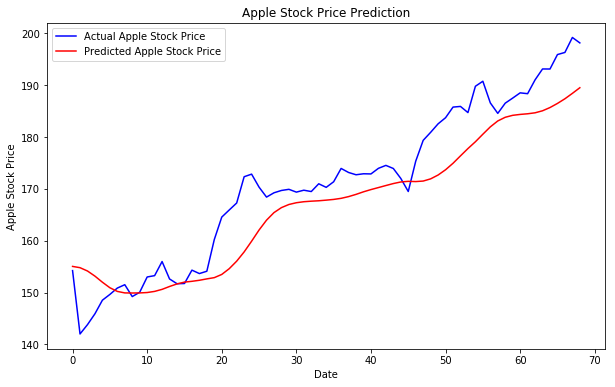

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_stock_data_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
#inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)


test_inputs = test_stock_data_processed.reshape(-1,1)
test_inputs = sc.transform(test_inputs)


print(test_inputs.shape)

In [ ]:
test_features = []
for i in range(60, 291):
    test_features.append(test_inputs[i-60:i, 0])

test_features = np.array(test_features)

In [ ]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
print(test_features.shape)

In [ ]:
predicted_stock_price = model.predict(test_features)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

In [ ]:
print(test_stock_data_processed.shape)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_stock_data_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

## Download the model and the weights

In [ ]:
from google.colab import files

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

NameError: ignored

In [ ]:
files.download("model.json")

In [ ]:
model.save('weights.h5')
files.download('weights.h5')